In [1]:
import pickle
import csv
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display

In [2]:
def load_part(file_name):
    with open(file_name, 'rb') as handle:
        return pickle.load(handle)

In [3]:
master_dict = load_part('data/tmdb_info.pickle')

In [4]:
with open('data/genre_pairs.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['movie_id', 'release_date', 'budget', 'revenue',  'genre'])
    for movie_id, movie in master_dict.iteritems():
        for genre in movie.genres:
            writer.writerow([movie_id, movie.release_date, movie.budget, movie.revenue, genre['name']])

In [5]:
df = pd.DataFrame.from_csv('data/genre_pairs.csv')

In [6]:
df['release_date'] = pd.to_datetime(df.release_date)
df['year'] = df['release_date'].dt.year

In [7]:
df.sample(n = 5)

,release_date,budget,revenue,genre,year
movie_id,,,,,
85357,1956-02-01,0,0,Drama,1956.0
377611,2011-05-03,0,0,Adventure,2011.0
61394,1993-10-18,0,0,Animation,1993.0
18259,1977-02-15,0,0,Romance,1977.0
23615,1982-11-09,0,0,Drama,1982.0


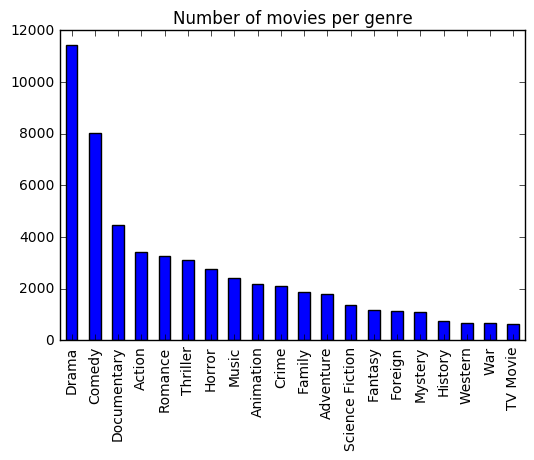

In [8]:
df['genre'].value_counts().plot(kind="bar", title = 'Number of movies per genre')
plt.show()

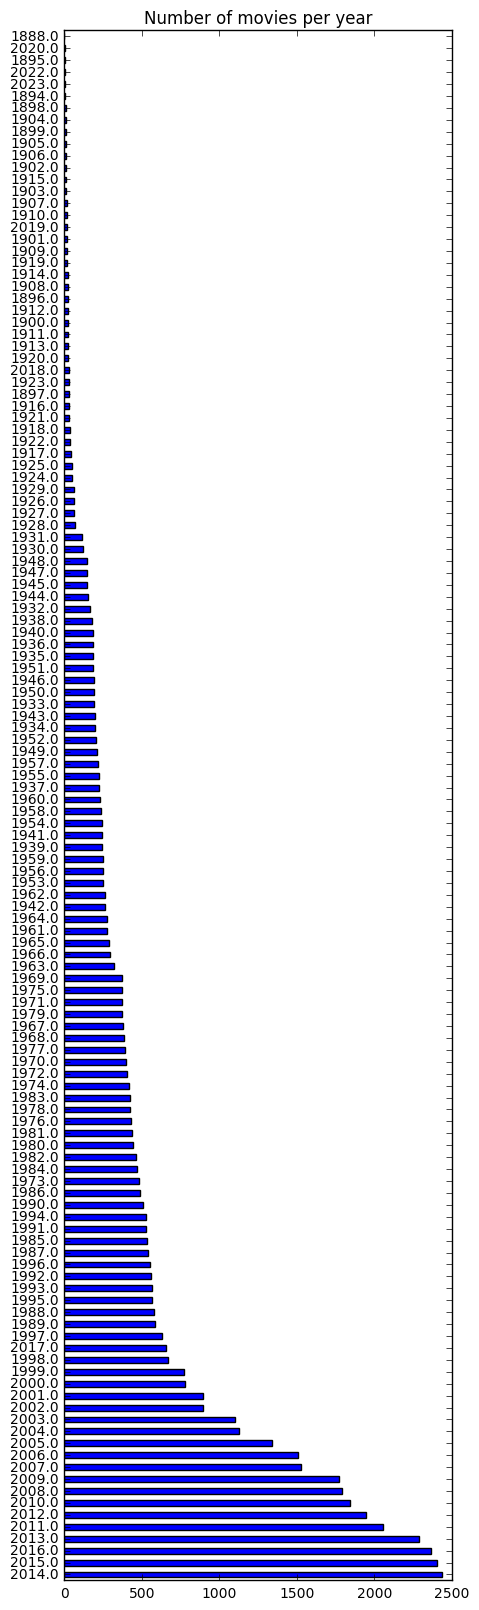

In [9]:
df['year'].value_counts().plot(kind="barh", figsize = (5, 20), title = 'Number of movies per year')
plt.show()

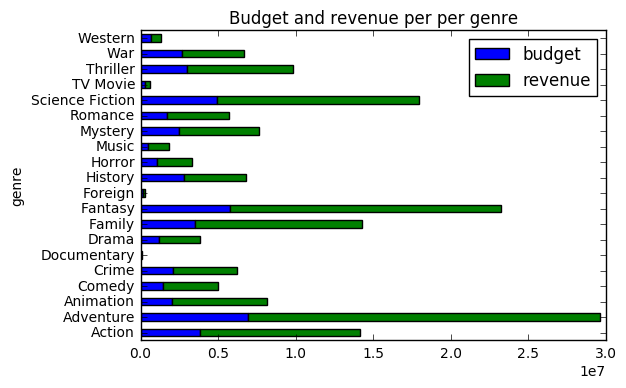

In [10]:
df.groupby(['genre'])['budget', 'revenue'].mean().plot(
    kind = 'barh', stacked = True, title = 'Budget and revenue per per genre')
plt.show()

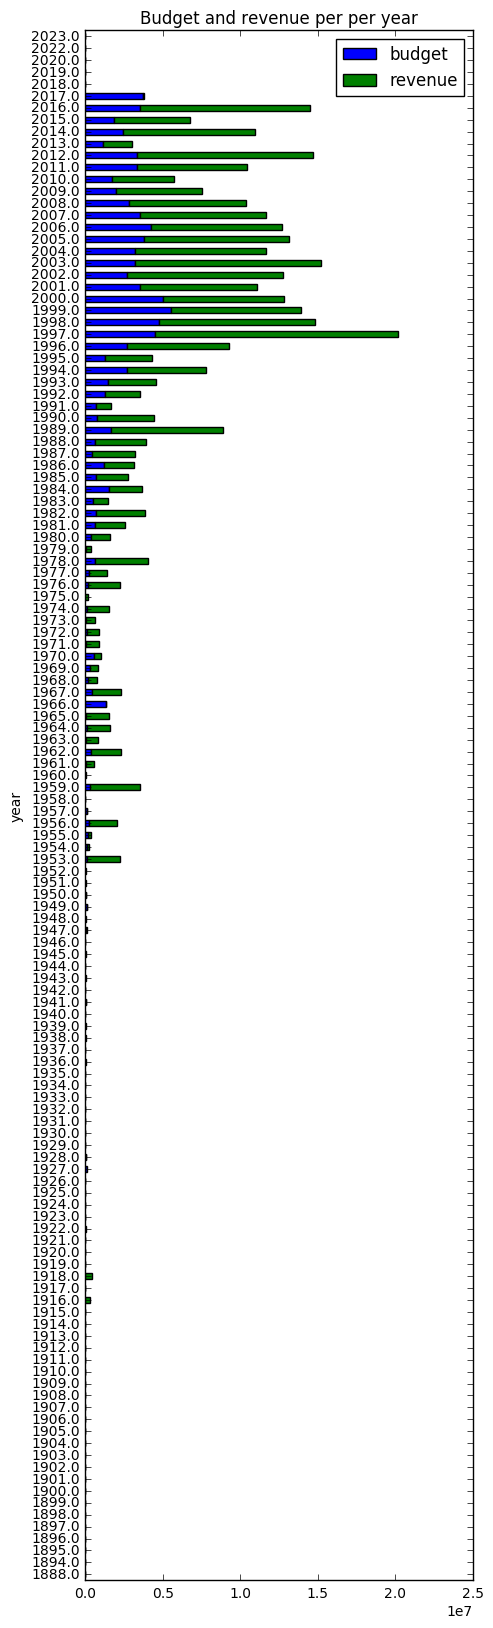

In [11]:
df.groupby(['year'])['budget', 'revenue'].mean().plot(
    kind = 'barh', stacked = True, figsize = (5, 20), title = 'Budget and revenue per per year')
plt.show()